## Parte 1

Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def show_chromatic_coordinates(image_path):
    # Cargar la imagen
    img = cv.imread(image_path)
    
    # Convertir la imagen a coordenadas cromáticas
    def to_chromatic_coordinates(img):
        # Convertir a RGB
        image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        # Extraer los canales RGB en tipo flotante
        R = image_rgb[:, :, 0].astype(float)
        G = image_rgb[:, :, 1].astype(float)
        B = image_rgb[:, :, 2].astype(float)
        
        # Calcular la suma de los canales y evitar división por cero
        sum_rgb = R + G + B
        sum_rgb[sum_rgb == 0] = 1  # Evitar divisiones por cero

        # Calcular coordenadas cromáticas
        r_c = R / sum_rgb
        g_c = G / sum_rgb
        
        # Crear la imagen en coordenadas cromáticas
        chromatic_coordinates = np.stack([r_c, g_c, np.zeros_like(r_c)], axis=2)
        
        return chromatic_coordinates

    # Aplicar la transformación a coordenadas cromáticas
    chromatic_img = to_chromatic_coordinates(img)
    
    # Mostrar ambas imágenes: la original y la transformada
    plt.figure(figsize=(12, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    # Imagen en coordenadas cromáticas
    plt.subplot(1, 2, 2)
    plt.imshow(chromatic_img)
    plt.title('Coordenadas Cromáticas Invariantes a Contraste')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


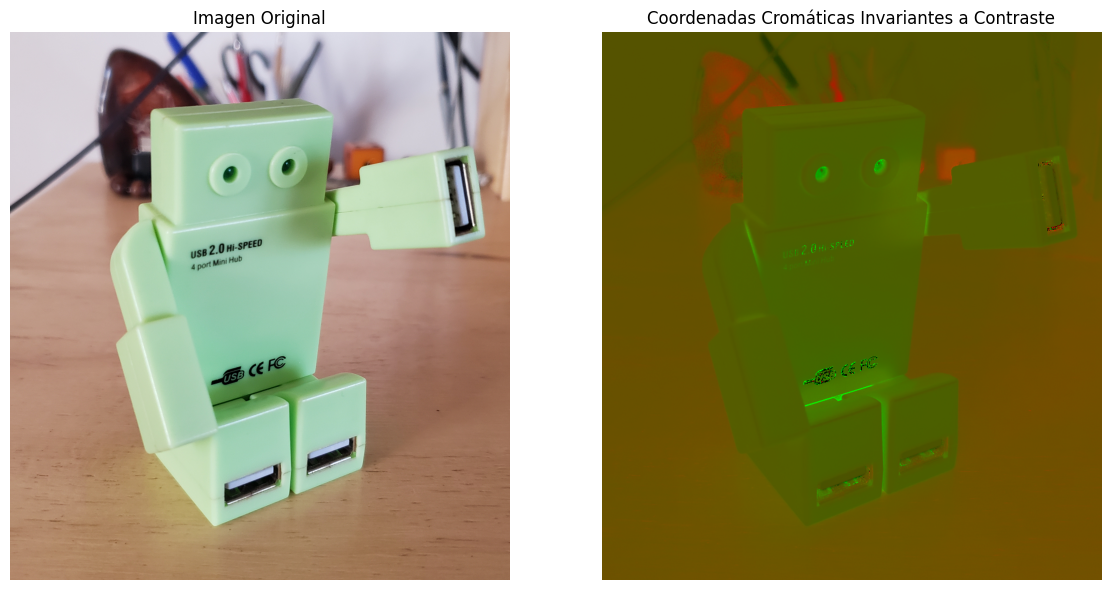

In [3]:
show_chromatic_coordinates('coord_cromaticas/CoordCrom_1.png')

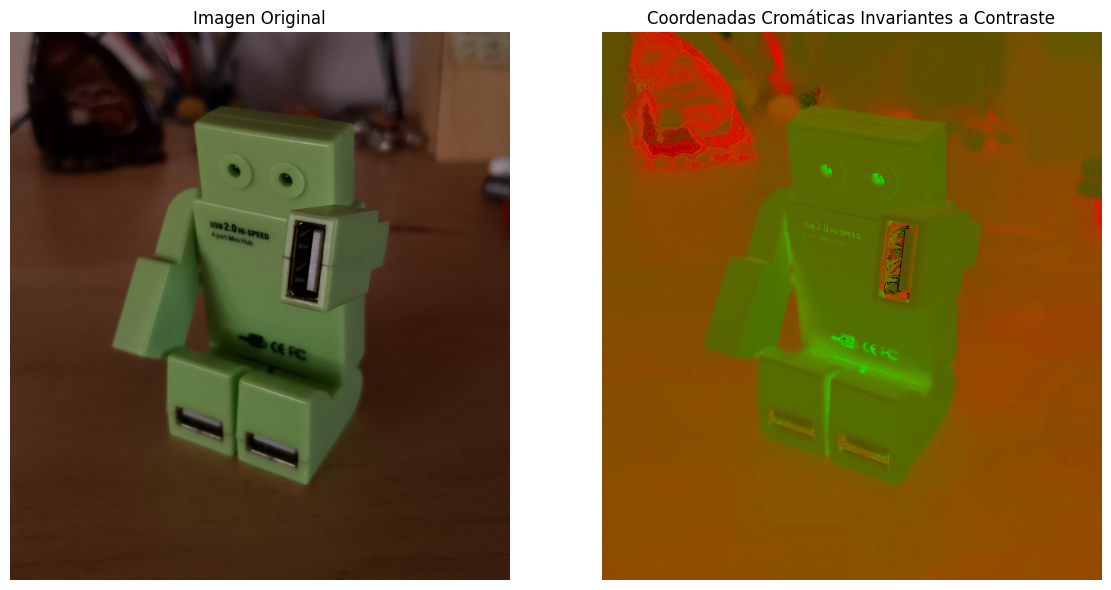

In [4]:
show_chromatic_coordinates('coord_cromaticas/CoordCrom_2.png')

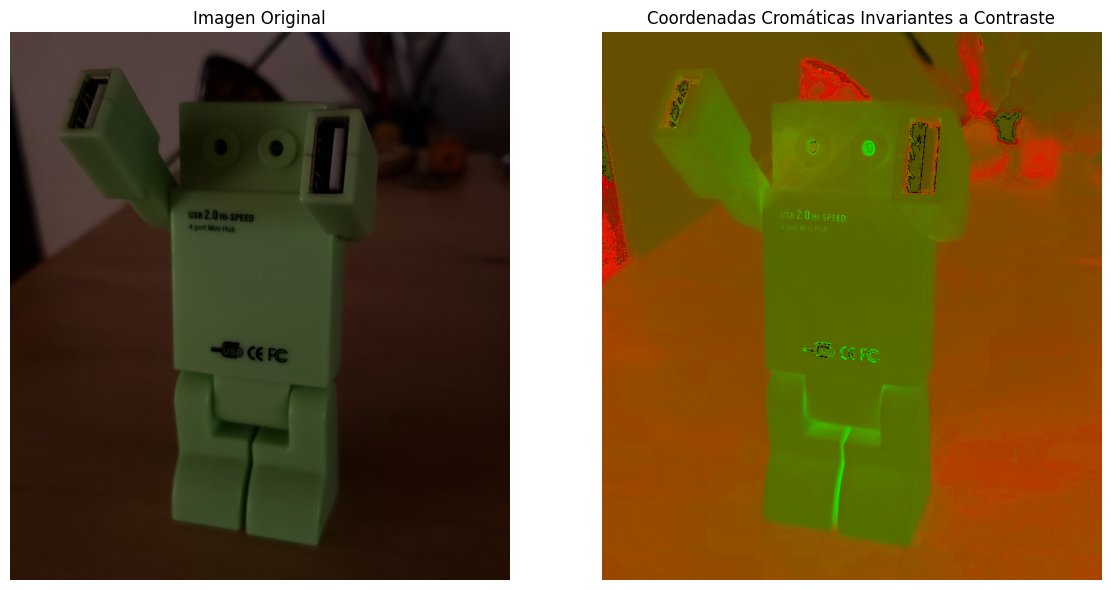

In [5]:
show_chromatic_coordinates('coord_cromaticas/CoordCrom_3.png')

## Parte 2

Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [8]:
def white_patch_algorithm(image_path):
    # Cargar la imagen
    image = cv.imread(image_path)

    # Verificar si la imagen se cargó correctamente
    if image is None:
        print(f"Error: No se pudo cargar la imagen en la ruta {image_path}")
        return

    # Convertir de BGR a RGB para que los colores se vean correctamente en Matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Aplicar el algoritmo White Patch en cada canal
    R = image_rgb[:, :, 0].astype(float)
    G = image_rgb[:, :, 1].astype(float)
    B = image_rgb[:, :, 2].astype(float)

    # Encontrar los valores máximos de cada canal para la normalización
    R_max = R.max() if R.max() > 0 else 1
    G_max = G.max() if G.max() > 0 else 1
    B_max = B.max() if B.max() > 0 else 1

    # Normalizar cada canal al valor máximo (255)
    R_white = (R / R_max) * 255
    G_white = (G / G_max) * 255
    B_white = (B / B_max) * 255

    # Recombinar los canales normalizados
    white_patch_image = np.stack([R_white, G_white, B_white], axis=2).astype(np.uint8)

    # Mostrar ambas imágenes: la original y la transformada
    plt.figure(figsize=(12, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Imagen Original')
    plt.axis('off')

    # Imagen con White Patch aplicado
    plt.subplot(1, 2, 2)
    plt.imshow(white_patch_image)
    plt.title('Imagen con White Patch')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

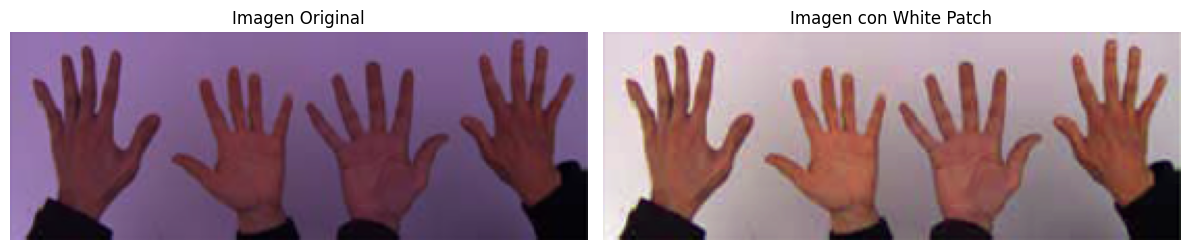

In [9]:
white_patch_algorithm("white_patch/test_blue.png") 

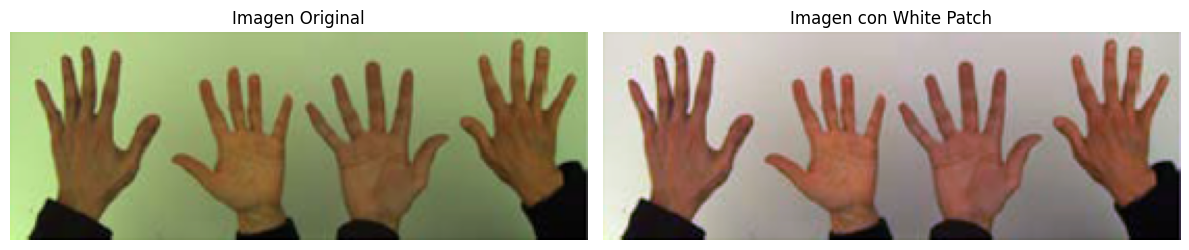

In [10]:
white_patch_algorithm('white_patch/test_green.png') 

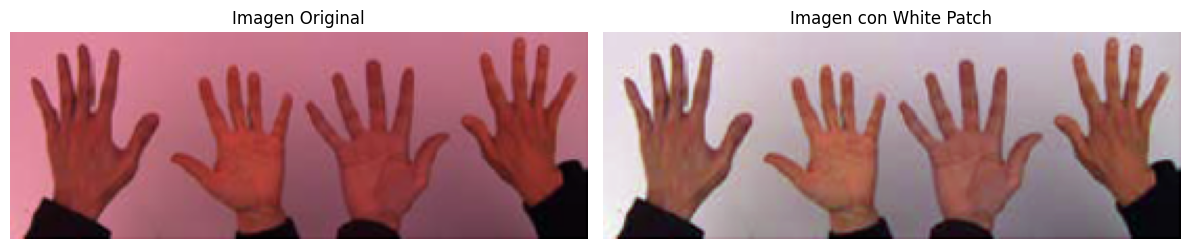

In [11]:
white_patch_algorithm('white_patch/test_red.png') 

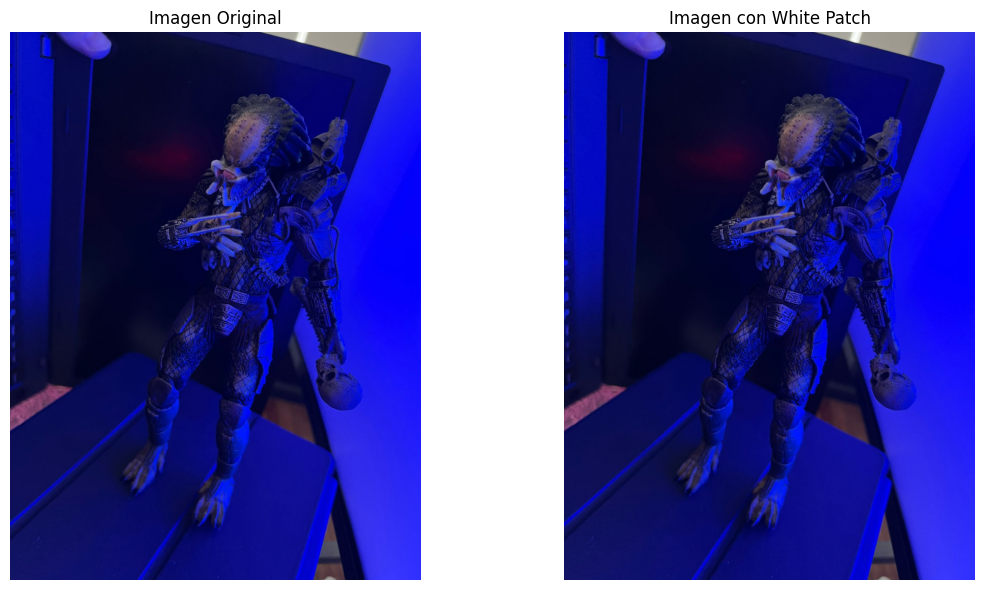

In [12]:
white_patch_algorithm('white_patch/wp_blue.jpg') 

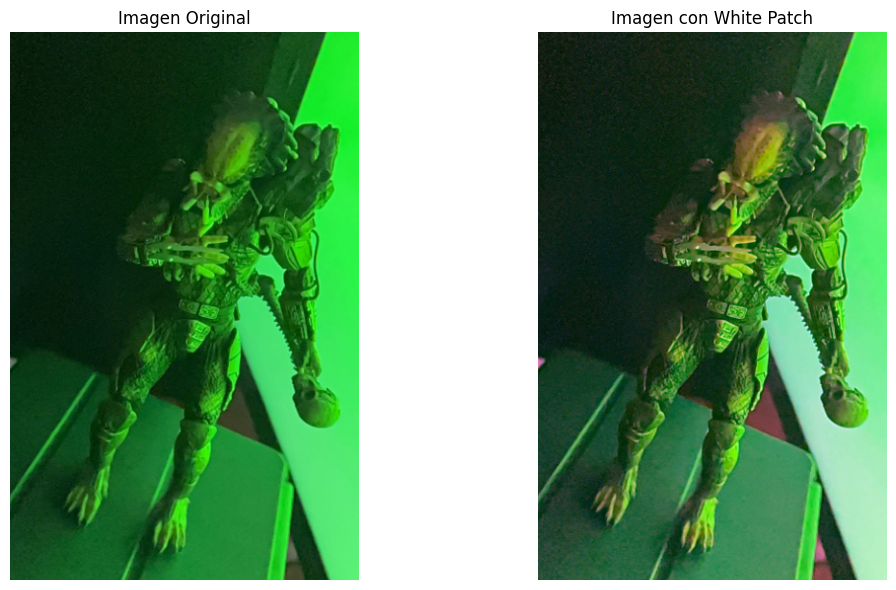

In [13]:
white_patch_algorithm('white_patch/wp_green.png') 

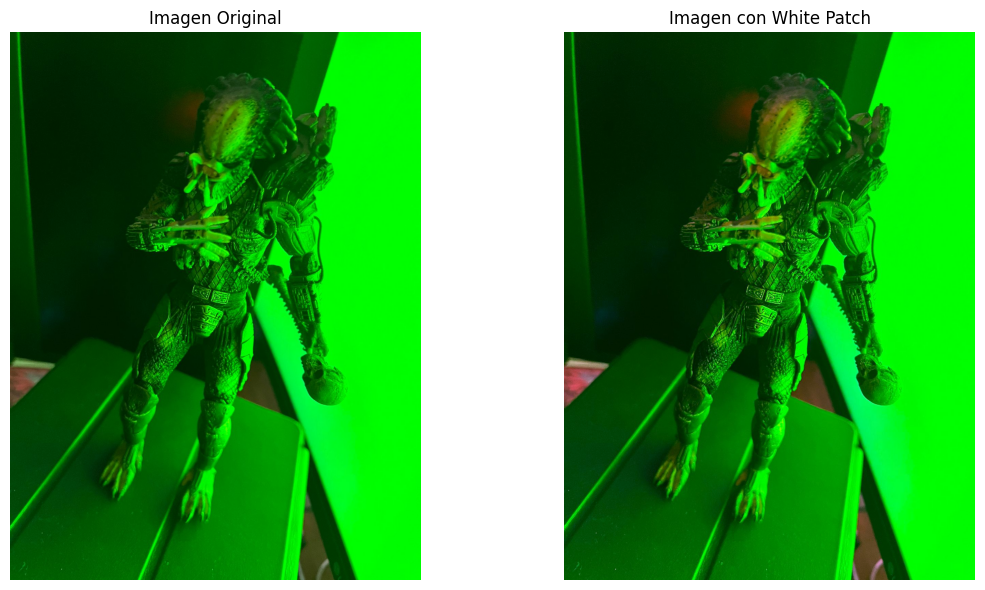

In [14]:
white_patch_algorithm('white_patch/wp_green2.jpg') 

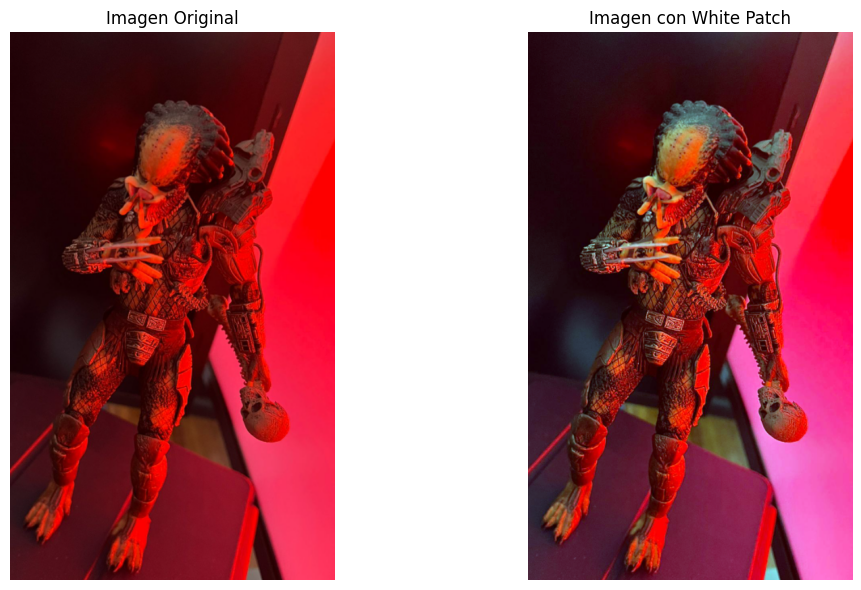

In [15]:
white_patch_algorithm('white_patch/wp_red.png') 

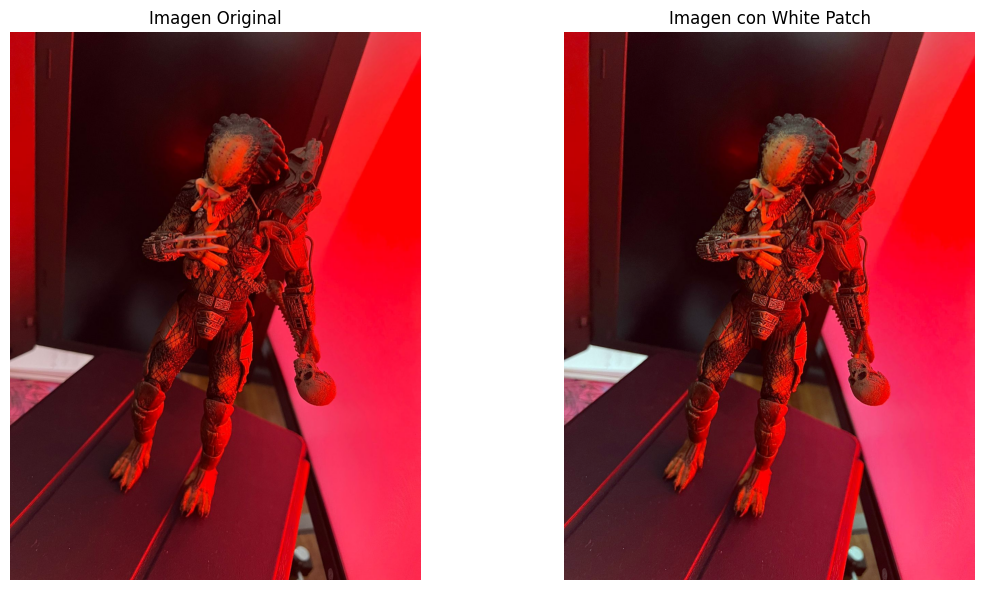

In [16]:
white_patch_algorithm('white_patch/wp_red2.jpg') 

### Análisis de Resultados y Posibles Fallas de White Patch:

Posibles Fallas: White Patch puede fallar si la imagen no contiene ninguna área verdaderamente blanca (que represente la iluminación). En estos casos, el algoritmo puede intensificar los colores de forma incorrecta o alterar los tonos.
Para mejorar, podrías considerar algoritmos avanzados como la normalización basada en histogramas o algoritmos de balance de blancos más sofisticados.

## Parte 2


Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

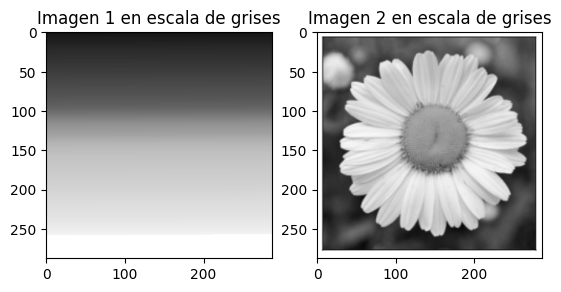

In [46]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen 1 en escala de grises')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Imagen 2 en escala de grises')
plt.show()


Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

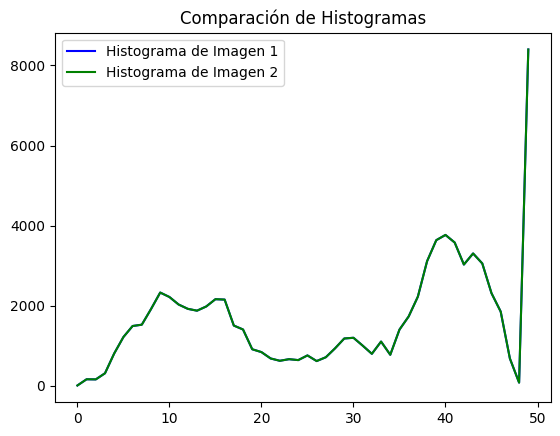

In [47]:
bins = 50
hist1 = cv.calcHist([img1], [0], None, [bins], [0, 256])
hist2 = cv.calcHist([img2], [0], None, [bins], [0, 256])

plt.figure()
plt.plot(hist1, color='blue', label='Histograma de Imagen 1')
plt.plot(hist2, color='green', label='Histograma de Imagen 2')
plt.title('Comparación de Histogramas')
plt.legend()
plt.show()


Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.

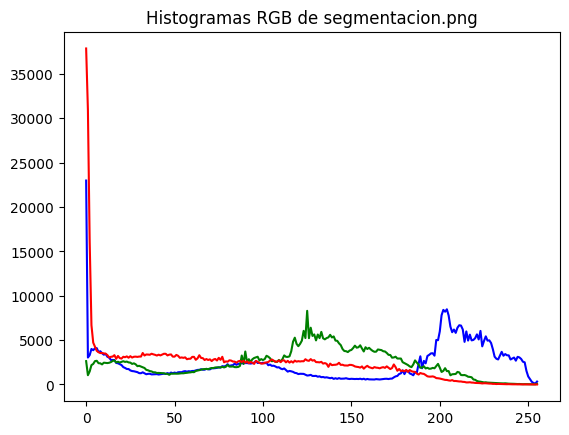

In [48]:
img_segment = cv.imread('segmentacion.png')
color = ('b', 'g', 'r')
plt.figure()
for i, col in enumerate(color):
    hist = cv.calcHist([img_segment], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Histogramas RGB de segmentacion.png')
plt.show()


Segmentación por Colores usando Máscaras:

    Segmentar el agua, cielo, y tierra, ajustando los valores RGB para crear máscaras específicas para cada componente. Como ejemplo:

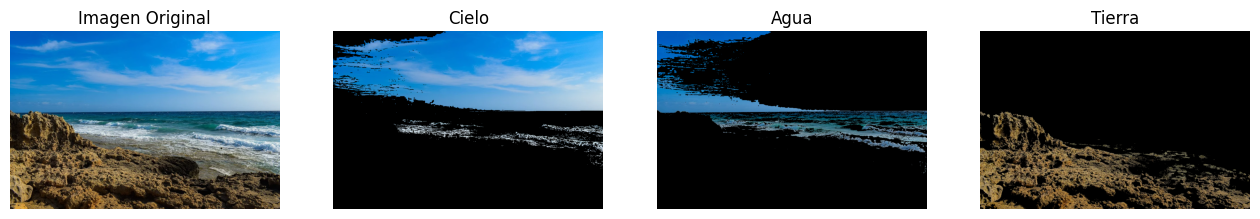

In [59]:
img_rgb = cv.cvtColor(img_segment, cv.COLOR_BGR2RGB)  # Convertir a RGB para visualización en Matplotlib
img_hsv = cv.cvtColor(img_segment, cv.COLOR_BGR2HSV)  # Convertir a HSV para segmentación

# Máscara para el cielo (azul claro en HSV)
lower_sky = np.array([90, 20, 200])  # Ajustado para capturar el cielo en el espacio HSV
upper_sky = np.array([130, 255, 255])
mask_sky = cv.inRange(img_hsv, lower_sky, upper_sky)
sky = cv.bitwise_and(img_rgb, img_rgb, mask=mask_sky)

# Máscara para el agua (azul oscuro en HSV)
lower_water = np.array([90, 50, 100])  # Valores ajustados para capturar el mar en HSV
upper_water = np.array([130, 255, 200])
mask_water = cv.inRange(img_hsv, lower_water, upper_water)
water = cv.bitwise_and(img_rgb, img_rgb, mask=mask_water)

# Máscara para la tierra (marrón en HSV)
lower_ground = np.array([10, 50, 50])  # Valores ajustados para tonos marrones
upper_ground = np.array([30, 255, 200])
mask_ground = cv.inRange(img_hsv, lower_ground, upper_ground)
ground = cv.bitwise_and(img_rgb, img_rgb, mask=mask_ground)

# Mostrar los resultados
plt.figure(figsize=(16, 8))

# Imagen original
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Segmentación del cielo
plt.subplot(1, 4, 2)
plt.imshow(sky)
plt.title('Cielo')
plt.axis('off')

# Segmentación del agua
plt.subplot(1, 4, 3)
plt.imshow(water)
plt.title('Agua')
plt.axis('off')

# Segmentación de la tierra
plt.subplot(1, 4, 4)
plt.imshow(ground)
plt.title('Tierra')
plt.axis('off')

plt.show()
